In [163]:
import glob
import numpy as np
import pandas as pd
import seaborn as sns
from numpy import array
from numpy import argmax
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from collections import Counter
from sklearn import preprocessing
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import label_binarize
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.datasets import make_classification
from sklearn.feature_extraction import FeatureHasher
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from matplotlib import pyplot
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFECV
from sklearn import linear_model
import scipy.stats as stat
import statsmodels.api as sm
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import binarize
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import AdaBoostClassifier
import xgboost as xgb
import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")

# Data Pre-processing

In [160]:
df = pd.read_csv('/Users/divyakulkarni/Desktop/ML/Project/train.csv', sep=';')


#Feature hashing
fh = FeatureHasher(n_features=1, input_type='string')
result_job = fh.fit_transform(df['job'])
df_cleaned = pd.DataFrame()

for column in df:
    if type(df[column][0]) == str:
        fh = FeatureHasher(n_features=1, input_type='string')
        result = fh.fit_transform(df[column])
        df_temp=pd.DataFrame(result.toarray())[0].to_frame()
        df_temp.columns=[column]
        df_cleaned= pd.concat([df_cleaned,df_temp], axis=1)
df_cl1= pd.concat([df_cleaned.iloc[:,0:10],df[['age','duration','campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y']]], axis=1)

#OHE
df_ohe= pd.DataFrame()
for column in df:
    if type(df[column][0]) == str:
        values= array(df[column])
        label_encoder = LabelEncoder()
        integer_encoded = label_encoder.fit_transform(values)
        df_ohe_temp=pd.DataFrame(integer_encoded)
        df_ohe_temp.columns= [column]
        df_ohe=pd.concat([df_ohe, df_ohe_temp],axis=1)
df_cl2= pd.concat([df_ohe.iloc[:,0:10],df[['age','duration','campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y']]], axis=1)



#Normmalize data
normalized_X = preprocessing.normalize(df_cl1.iloc[:,0:20])
normalized_df= pd.DataFrame(normalized_X)
normalized_df1= pd.concat([normalized_df, df_cl1['y']], axis=1)

#Scaling data
scaled_X= preprocessing.scale(df_cl1.iloc[:,0:20])
scaled_df= pd.DataFrame(scaled_X)
scaled_df1= pd.concat([scaled_df, df_cl1['y']], axis=1)


#SMOTE
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_sample(scaled_df.values, df_cl1['y'].values)
v= pd.DataFrame(y_res)
v.columns=["Y"]
u=pd.DataFrame(X_res)
smote_df= pd.concat([u,v], axis=1)
col_name= pd.Index.tolist(df_cl1.columns)
smote_df.columns= col_name
print(smote_df)


           job   marital  education   default   housing      loan   contact  \
0     1.072649  0.754616  -0.220958  0.498019  0.733910 -0.136388  0.741533   
1    -0.699455 -1.498821  -1.280636  0.498019 -0.607343 -0.136388 -1.348558   
2    -0.699455  0.754616  -1.280636  0.498019  0.733910 -0.136388 -1.348558   
3    -0.699455  0.754616  -0.220958  0.498019 -4.631103 -4.967410 -1.348558   
4    -0.193139  0.754616   0.838721  0.498019  0.733910 -0.136388  0.741533   
5    -0.699455 -1.498821   0.838721  0.498019 -0.607343 -0.136388  0.741533   
6    -0.193139 -1.498821   0.838721  0.498019  0.733910 -0.136388  0.741533   
7     0.819491  0.754616   0.838721 -2.007954  0.733910 -0.136388  0.741533   
8    -0.699455 -0.211142   1.545173  0.498019 -0.607343 -0.136388  0.741533   
9     1.072649  0.754616  -0.220958 -2.007954 -0.607343 -0.136388 -1.348558   
10   -0.699455 -1.498821  -0.220958 -2.007954  0.733910 -0.136388  0.741533   
11    1.578965 -1.498821  -0.927410  0.498019 -0.607

In [161]:
## Importing Test data set

df_test=pd.DataFrame(columns=('age','duration','campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'))
df_test=pd.read_csv('/Users/divyakulkarni/Desktop/ML/Project/test.csv',header=None, sep=';')
df_test.columns= df.columns[0:20]


## Feature hashing

df_cleaned_test = pd.DataFrame()
for column in df_test:
    if type(df_test[column][0]) == str:
        fh_test = FeatureHasher(n_features=1, input_type='string')
        result_test = fh_test.fit_transform(df_test[column])
        
        df_temp_test=pd.DataFrame(result_test.toarray())[0].to_frame()
        df_temp_test.columns=[column]
        df_cleaned_test= pd.concat([df_cleaned_test,df_temp_test], axis=1)
df_cl1_test= pd.concat([df_cleaned_test.iloc[:,0:10],df_test[['age','duration','campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']]], axis=1)



##OHE

df_ohe_test= pd.DataFrame()
for column in df_test:
    if type(df_test[column][0]) == str:
        values= array(df_test[column])
        label_encoder_test = LabelEncoder()
        integer_encoded_test = label_encoder.fit_transform(values)
        df_test_ohe_temp=pd.DataFrame(integer_encoded_test)
        df_test_ohe_temp.columns= [column]
        df_ohe_test=pd.concat([df_ohe_test, df_test_ohe_temp],axis=1)
df_cl2_test= pd.concat([df_ohe_test.iloc[:,0:10],df_test[['age','duration','campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']]], axis=1)


#Normmalize data

normalized_X_test = preprocessing.normalize(df_cl2_test)
normalized_df_test= pd.DataFrame(normalized_X_test)
#normalized_df1_test= pd.concat([normalized_df_test, df_cl1['y']], axis=1, sort=False)
#print(normalized_df_test)


#Scaling

scaled_test= preprocessing.scale(df_cl1_test.iloc[:,0:20])
scaled_df_test= pd.DataFrame(scaled_test)
print(scaled_df_test)




            0         1         2        3         4         5         6   \
0     0.312340 -0.262120  0.797609  0.47506 -0.605851 -0.139347  0.749709   
1    -0.190276 -1.905872 -1.301855  0.47506 -0.605851 -0.139347 -1.333850   
2    -0.190276 -1.577122 -0.252123  0.47506 -0.605851 -0.139347 -1.333850   
3    -0.190276  0.724132 -1.301855  0.47506  0.745848  1.486364  0.749709   
4     1.066264  0.724132 -1.301855  0.47506 -0.605851 -0.139347  0.749709   
5     1.568880  0.724132  0.797609  0.47506  0.745848 -0.139347 -1.333850   
6    -0.692892  0.724132  1.497430  0.47506  0.745848 -0.139347 -1.333850   
7    -0.692892 -0.262120 -1.301855  0.47506 -0.605851  1.486364 -1.333850   
8     1.317572  0.724132  0.797609  0.47506 -0.605851 -0.139347 -1.333850   
9    -0.190276  0.724132 -1.301855 -2.09946  0.745848  1.486364 -1.333850   
10   -1.698124 -1.577122  0.797609  0.47506  0.745848 -0.139347  0.749709   
11    1.317572 -1.577122  0.797609  0.47506 -0.605851 -0.139347 -1.333850   

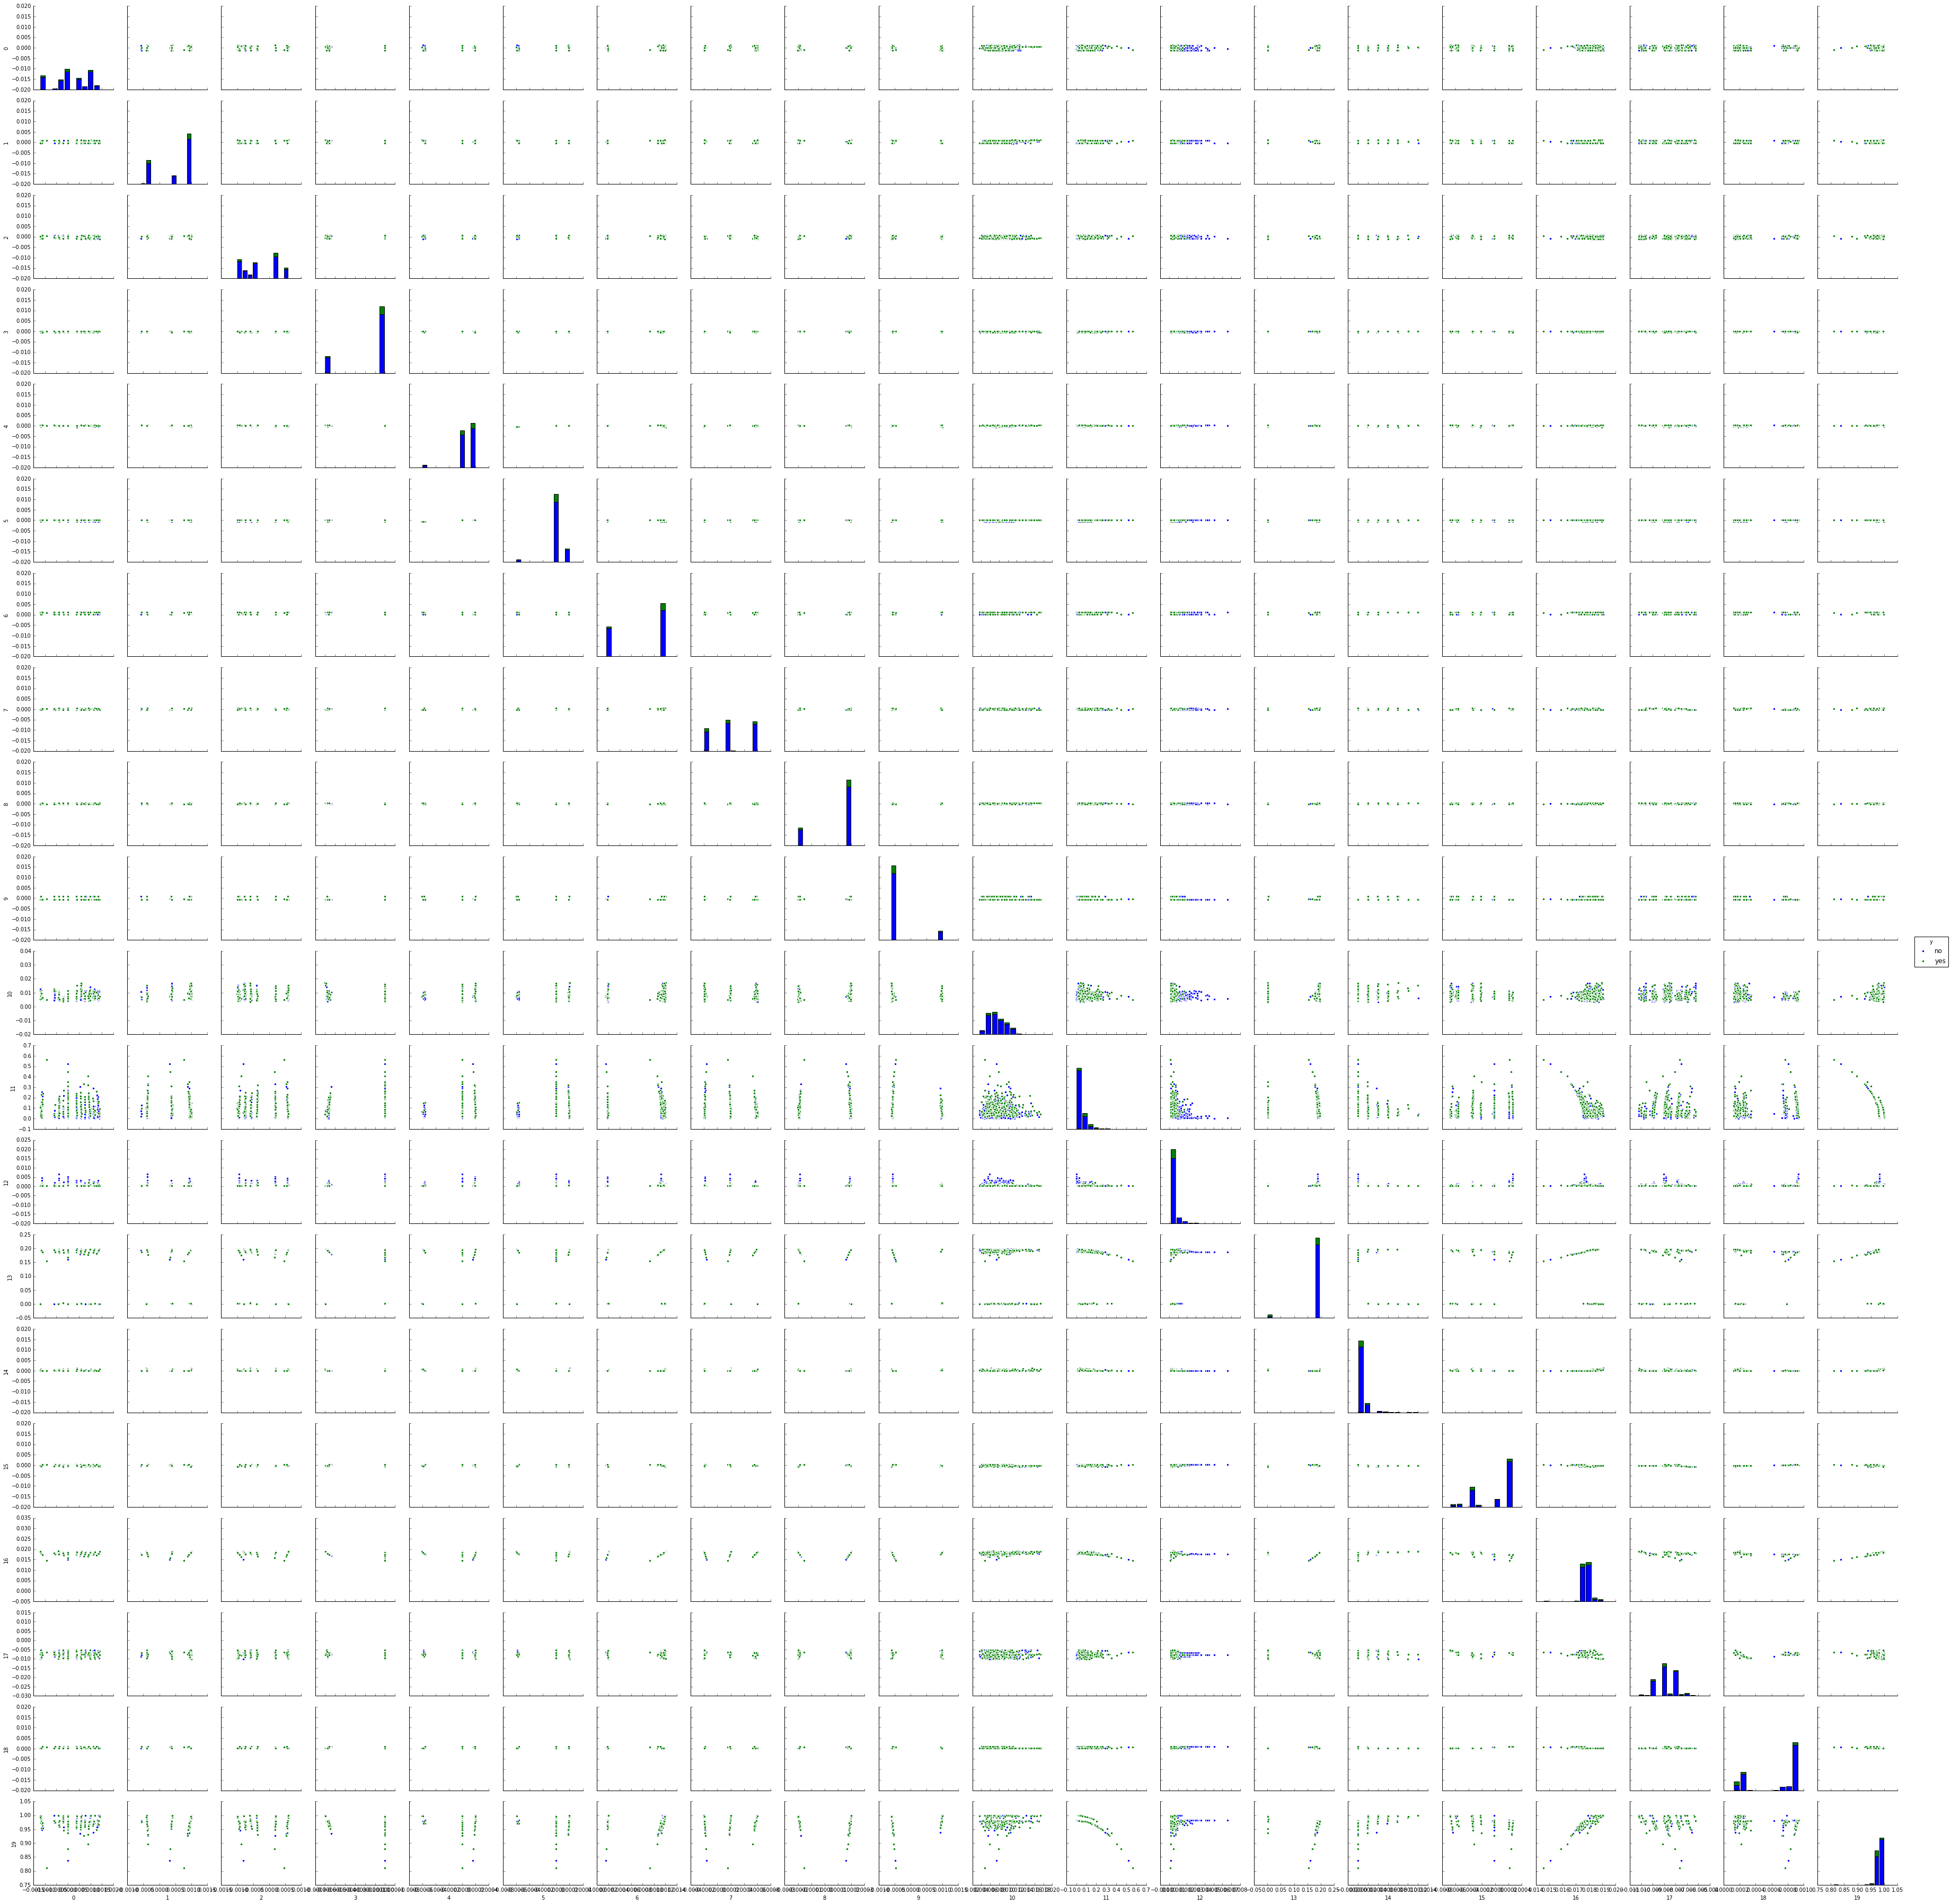

In [8]:
#scatter plots of before smote, normalized

sns.pairplot(data=normalized_df1.iloc[:,0:21], hue= 'y')
plt.show()


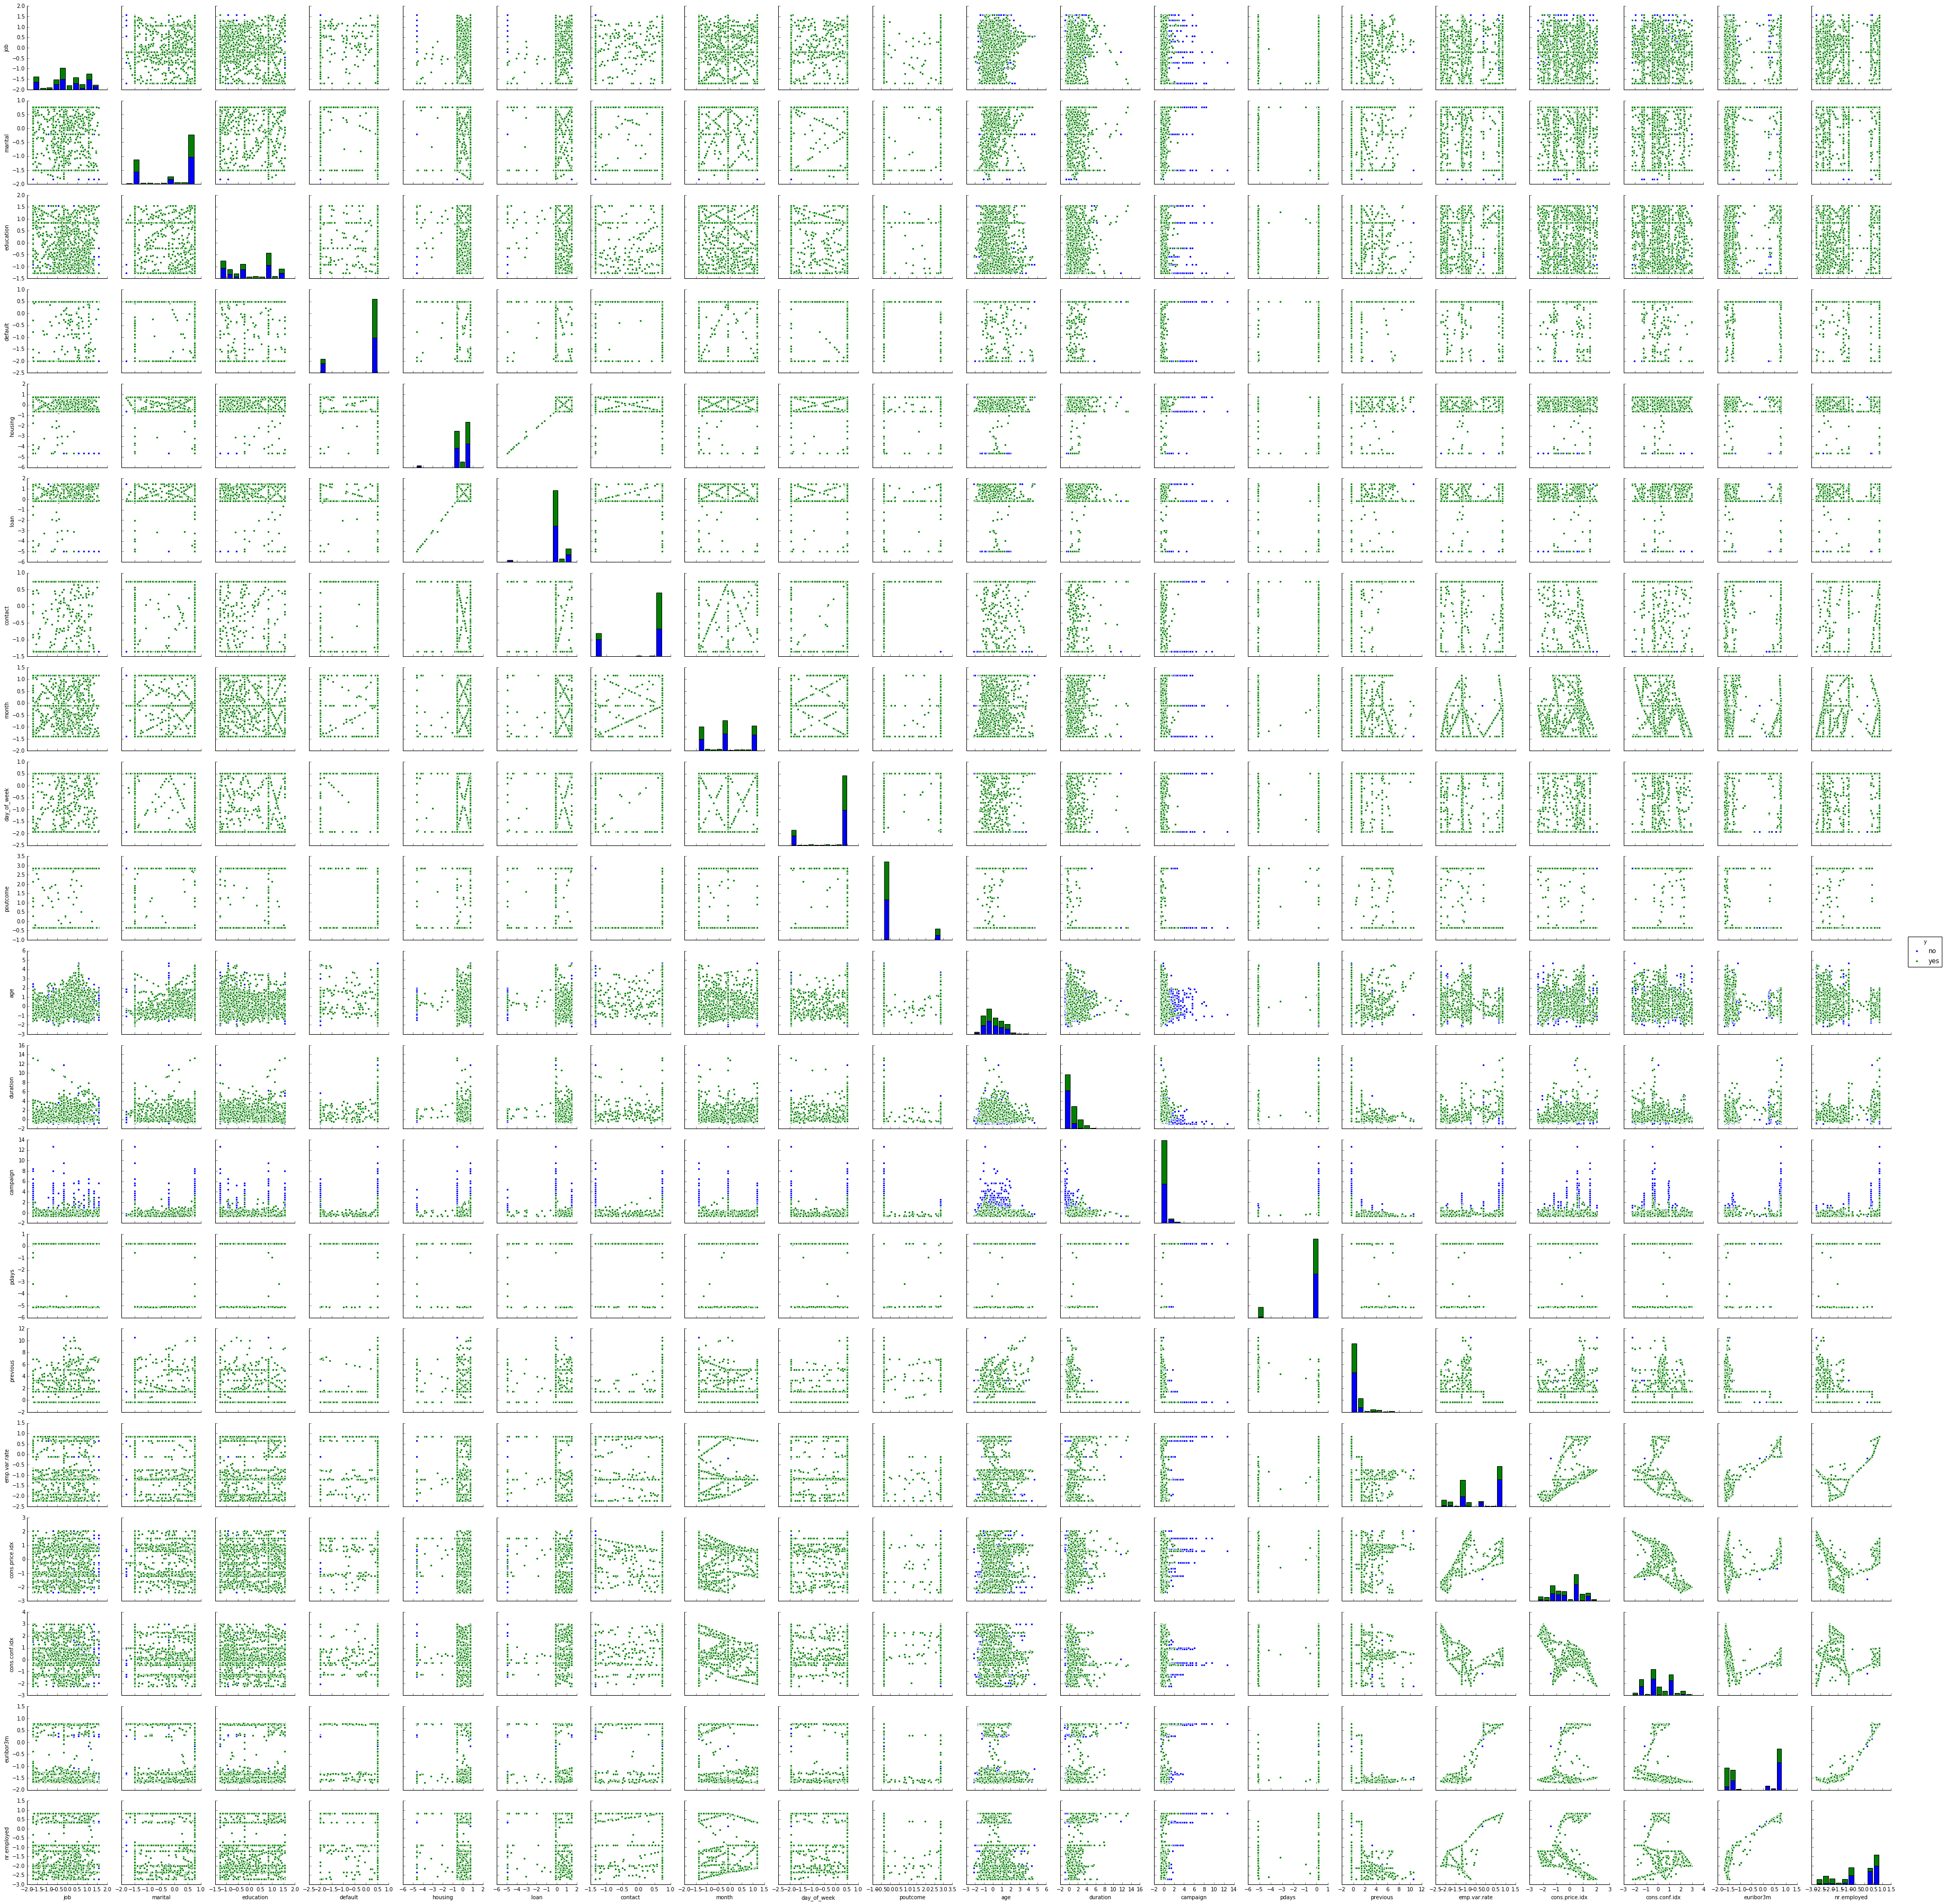

In [162]:
#scatter plots of after smote, normalized

sns.pairplot(data=smote_df.iloc[:,0:21], hue= 'y')
plt.show()


In [153]:
#Binarize the data to convert into numeric
 
y_res = label_binarize(pd.DataFrame(y_res), classes=['yes', 'no'])
y_res=pd.DataFrame(y_res)
y_res.columns= ['cat']
print(y_res)                #The 0 1 output for the training data set 

      cat
0       1
1       1
2       1
3       1
4       1
5       1
6       1
7       1
8       1
9       1
10      1
11      1
12      1
13      1
14      1
15      1
16      1
17      1
18      1
19      0
20      1
21      0
22      1
23      1
24      1
25      0
26      1
27      1
28      1
29      1
...   ...
5306    0
5307    0
5308    0
5309    0
5310    0
5311    0
5312    0
5313    0
5314    0
5315    0
5316    0
5317    0
5318    0
5319    0
5320    0
5321    0
5322    0
5323    0
5324    0
5325    0
5326    0
5327    0
5328    0
5329    0
5330    0
5331    0
5332    0
5333    0
5334    0
5335    0

[5336 rows x 1 columns]


# Implementing Algorithms

## Logistic Regression

In [90]:
##Logistic Regression   ##Normalized + feature hashing 

logreg = LogisticRegression()
m = 0
kfold = model_selection.StratifiedKFold(n_splits=5)
C=[10,7.5,  1, .1,  0.1, .001]

for i in C:
    logreg = LogisticRegression(penalty='l1',solver='liblinear', C=i)
    logreg.fit(smote_df.iloc[:,0:20],y_res['cat'])
    results = model_selection.cross_val_score(logreg,smote_df.iloc[:,0:20],y_res['cat'], cv=5)

    if results.max()>m:
        m=results.max()
        i_val=i
        fea1= logreg.coef_

print("Accuracy from CV: ", m)                
print("C(lambda) value: ", i_val)
print("features numbers selected ", fea1) 

logreg = LogisticRegression(penalty='l1',solver='liblinear', C=10)
logreg.fit(smote_df.iloc[:,0:20],y_res['cat'])
train_res= pd.DataFrame(logreg.predict(smote_df.iloc[:,0:20]))        
print("Accuracy on the train data", accuracy_score(y_res['cat'], train_res))

test_res = pd.DataFrame(logreg.predict(normalized_df_test))        
a = test_res[0].values.tolist()

for i in range(0,len(a)):
    if a[i]==0:
        a[i]=1
    else: 
        a[i]=0

test_res = pd.DataFrame(a)       
test_res.columns= ['prediction']
#test_res.to_csv('C:/Users/Krishna/Desktop/usc/ML INF/project/op_lr_norm.csv', sep='\t',encoding='utf-8',index=False, )


Accuracy from CV:  0.86797752809
C(lambda) value:  10
features numbers selected  [[  109.99553834     0.             0.             0.             0.             0.
      0.             0.             0.             0.           -19.63780863
    -34.50959223     0.            11.54807639     0.             0.             0.
   -106.77994886  2162.70156901   -10.45961355]]
Accuracy on the train data 0.850262368816


In [159]:
##Logistic Regression   ##Normalized +OHE

logreg = LogisticRegression()
m=0
kfold = model_selection.StratifiedKFold(n_splits=5)
C=[10,7.5,  1, .1,  0.1, .001]

for i in C:
    logreg = LogisticRegression(penalty='l1',solver='liblinear', C=i)
    logreg.fit(smote_df.iloc[:,0:20],y_res['cat'])
    results = model_selection.cross_val_score(logreg,smote_df.iloc[:,0:20],y_res['cat'], cv=5)
    
    if results.max()>m:
        m=results.max()
        i_val=i
        fea1= logreg.coef_

print("Accuracy from CV: ", m)                
print("C(lambda) value: ",i_val)
print("features numbers selected ",fea1) 

logreg = LogisticRegression(penalty='l1',solver='liblinear', C=10)
logreg.fit(smote_df.iloc[:,0:20],y_res['cat'])
train_res= pd.DataFrame(logreg.predict(smote_df.iloc[:,0:20]))        
print("Accuracy on the train data", accuracy_score(y_res['cat'], train_res))
test_res= pd.DataFrame(logreg.predict(normalized_df_test))        
a=test_res[0].values.tolist()

for i in range(0,len(a)):
    if a[i]==0:
        a[i]=1
    else: 
        a[i]=0
        
test_res=pd.DataFrame(a)       
test_res.columns= ['prediction']

#test_res.to_csv('C:/Users/Krishna/Desktop/usc/ML INF/project/op_lr_norm1.csv', sep='\t',encoding='utf-8',index=False, )


Accuracy from CV:  0.864232209738
C(lambda) value:  10
features numbers selected  [[    0.             0.             0.             0.             0.             0.
      0.             0.             0.             0.           -14.22837811
    -34.46321444     0.            11.56029677     0.             0.
    -46.16346549   -97.24697408  2129.68967163   -10.08599159]]
Accuracy on the train data 0.849325337331


In [63]:
##Logistic Regression   ##scaled + FH

logreg = LogisticRegression()
m=0
kfold = model_selection.StratifiedKFold(n_splits=5)

C=[10,7.5,  1, .1,  0.1, .001]
for i in C:
    logreg = LogisticRegression(penalty='l1',solver='liblinear', C=i)
    logreg.fit(smote_df.iloc[:,0:20],y_res['cat'])
    results = model_selection.cross_val_score(logreg,smote_df.iloc[:,0:20],y_res['cat'], cv=5)
    
    if results.max()>m:
        m=results.max()
        i_val=i
        fea1= logreg.coef_

print("Accuracy from CV: ", m)                
print("C(lambda) value: ",i_val)
print("features numbers selected ",fea1) 

logreg = LogisticRegression(penalty='l1',solver='liblinear', C=10)
logreg.fit(smote_df.iloc[:,0:20],y_res['cat'])
train_res= pd.DataFrame(logreg.predict(smote_df.iloc[:,0:20]))        
print("Accuracy on the train data", accuracy_score(y_res['cat'], train_res))
test_res= pd.DataFrame(logreg.predict(scaled_df_test))        
a=test_res[0].values.tolist()

for i in range(0,len(a)):
    if a[i]==0:
        a[i]=1
    else: 
        a[i]=0
        
test_res=pd.DataFrame(a)       
test_res.columns= ['prediction']

#test_res.to_csv('C:/Users/Krishna/Desktop/usc/ML INF/project/op_lr_scaled1.csv', sep='\t',encoding='utf-8',index=False, )


Accuracy from CV:  0.896810506567
C(lambda) value:  10
features numbers selected  [[ 0.36135788  0.05969218 -0.09147161  0.0260292  -0.05494431 -0.0463604
  -0.74159843  0.11714815 -0.0623523   0.08127594 -0.25591356 -2.08693097
   0.38689234  0.35377828  0.13656739  1.85032922 -1.49185647 -0.62104331
   0.98819561 -0.87384448]]
Accuracy on the train data 0.887368815592


In [96]:
##Logistic Regression   ##scaled + OHE



logreg = LogisticRegression()
m=0
kfold = model_selection.StratifiedKFold(n_splits=5)
C=[10,7.5,  1, .1,  0.1, .001]

for i in C:
    logreg = LogisticRegression(penalty='l1',solver='liblinear', C=i)
    logreg.fit(smote_df.iloc[:,0:20],y_res['cat'])
    results = model_selection.cross_val_score(logreg,smote_df.iloc[:,0:20],y_res['cat'], cv=5)
    
    if results.max()>m:
        m=results.max()
        i_val=i
        fea1= logreg.coef_

print("Accuracy from CV: ", m)                
print("C(lambda) value: ",i_val)
print("features numbers selected ",fea1) 

logreg = LogisticRegression(penalty='l1',solver='liblinear', C=10)
logreg.fit(smote_df.iloc[:,0:20],y_res['cat'])
train_res= pd.DataFrame(logreg.predict(smote_df.iloc[:,0:20]))        
print("Accuracy on the train data", accuracy_score(y_res['cat'], train_res))

test_res= pd.DataFrame(logreg.predict(scaled_df_test))        
a=test_res[0].values.tolist()

for i in range(0,len(a)):
    if a[i]==0:
        a[i]=1
    else: 
        a[i]=0
        
test_res=pd.DataFrame(a)       
test_res.columns= ['prediction']
#test_res.to_csv('C:/Users/Krishna/Desktop/usc/ML INF/project/op_lr_scaled.csv', sep='\t',encoding='utf-8',index=False, )


Accuracy from CV:  0.894194756554
C(lambda) value:  0.1
features numbers selected  [[-0.17896916 -0.11564842 -0.08961916  0.00628145  0.          0.11732485
   0.50897814  0.22596792 -0.00563365 -0.18628076 -0.10402469 -1.97715379
   0.23891643  0.20123524  0.          1.65925623 -0.94882543 -0.41764704
   0.          0.        ]]
Accuracy on the train data 0.885307346327


## Random Forest

In [91]:
## Random Forest Normalized + FH

clf = RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=None,min_samples_split=2, min_samples_leaf=50, min_weight_fraction_leaf=0.0, max_features='auto', max_leaf_nodes=None,bootstrap=True, oob_score=True, n_jobs=1, random_state=42, verbose=0, warm_start=False,class_weight=None)
clf.fit(smote_df.iloc[:,0:20],y_res['cat'])

results = model_selection.cross_val_score(clf,smote_df.iloc[:,0:20],y_res['cat'], cv=5)

if results.max()>m:
    m=results.max()
    
print("Accuracy from CV: ", m)                

y_pred_random_forest= pd.DataFrame(clf.predict(normalized_df_test))
a=y_pred_random_forest[0].values.tolist()

for i in range(0,len(a)):

    if a[i]==0:
        a[i]=1
    else: 
        a[i]=0
        
y_pred_random_forest=pd.DataFrame(a)       
y_pred_random_forest.columns= ['prediction']

#y_pred_random_forest.to_csv('C:/Users/Krishna/Desktop/usc/ML INF/project/op_randomf_norm.csv', sep='\t',encoding='utf-8',index=False, )


Accuracy from CV:  0.909943714822


In [160]:
## Random Forest Normalized + OHE

clf = RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=None,min_samples_split=2, min_samples_leaf=50, min_weight_fraction_leaf=0.0, max_features='auto', max_leaf_nodes=None,bootstrap=True, oob_score=True, n_jobs=1, random_state=42, verbose=0, warm_start=False,class_weight=None)
clf.fit(smote_df.iloc[:,0:20],y_res['cat'])
y_pred_random_forest= pd.DataFrame(clf.predict(normalized_df_test))
results = model_selection.cross_val_score(clf,smote_df.iloc[:,0:20],y_res['cat'], cv=5)

if results.max()>m:
    m=results.max()
    
print("Accuracy from CV: ", m)             

a=y_pred_random_forest[0].values.tolist()

for i in range(0,len(a)):

    if a[i]==0:
        a[i]=1
    else: 
        a[i]=0
        
y_pred_random_forest=pd.DataFrame(a)       
y_pred_random_forest.columns= ['prediction']
#print(y_pred_random_forest)

Accuracy from CV:  0.904315196998


In [64]:
### Random Forest    #scaled + FH

clf = RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=None,min_samples_split=2, min_samples_leaf=50, min_weight_fraction_leaf=0.0, max_features='auto', max_leaf_nodes=None,bootstrap=True, oob_score=True, n_jobs=1, random_state=42, verbose=0, warm_start=False,class_weight=None)
clf.fit(smote_df.iloc[:,0:20],y_res['cat'])
results = model_selection.cross_val_score(clf,smote_df.iloc[:,0:20],y_res['cat'], cv=5)

if results.max()>m:
    m=results.max()
    

print("Accuracy from CV: ", m)  

y_pred_random_forest= pd.DataFrame(clf.predict(scaled_df_test))
a=y_pred_random_forest[0].values.tolist()

for i in range(0,len(a)):

    if a[i]==0:
        a[i]=1
    else: 
        a[i]=0
        
y_pred_random_forest=pd.DataFrame(a)       
y_pred_random_forest.columns= ['prediction']

#y_pred_random_forest.to_csv('C:/Users/Krishna/Desktop/usc/ML INF/project/op_randomf_scaled1.csv', sep='\t',encoding='utf-8',index=False, )


Accuracy from CV:  0.914634146341


In [97]:
## Random Forest    #scaled + OHE

clf = RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=None,min_samples_split=2, min_samples_leaf=50, min_weight_fraction_leaf=0.0, max_features='auto', max_leaf_nodes=None,bootstrap=True, oob_score=True, n_jobs=1, random_state=42, verbose=0, warm_start=False,class_weight=None)
clf.fit(smote_df.iloc[:,0:20],y_res['cat'])
results = model_selection.cross_val_score(clf,smote_df.iloc[:,0:20],y_res['cat'], cv=5)

if results.max() > m:
    m = results.max()

print("Accuracy from CV: ", m)                

y_pred_random_forest= pd.DataFrame(clf.predict(scaled_df_test))
a=y_pred_random_forest[0].values.tolist()

for i in range(0,len(a)):

    if a[i]==0:
        a[i]=1
    else: 
        a[i]=0
        
y_pred_random_forest=pd.DataFrame(a)       
y_pred_random_forest.columns= ['prediction']

#y_pred_random_forest.to_csv('C:/Users/Krishna/Desktop/usc/ML INF/project/op_randomf_scaled.csv', sep='\t',encoding='utf-8',index=False, )


Accuracy from CV:  0.906191369606


In [27]:
## Random Forest grid search


# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

# Method of selecting samples for training each tree
bootstrap = [True, False]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

rf = RandomForestRegressor()

# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores

rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 30, cv = 3, verbose=2, random_state=42, n_jobs = -1)

# Fit the random search model

rf_random.fit(smote_df.iloc[:,0:20],y_res['cat'])
best_random = rf_random.best_estimator_
y_pred_random_forest1= pd.DataFrame(best_random.predict(normalized_df_test))
y_pred_random_forest1=binarize(y_pred_random_forest1.values.tolist(), threshold=0.9)

print(rf_random.best_params_)

a=y_pred_random_forest1

for i in range(0,len(a)):

    if a[i]==0:
        a[i]=1
    else: 
        a[i]=0
        
y_pred_random_forest1=pd.DataFrame(a)       
y_pred_random_forest1.columns= ['prediction']
print(y_pred_random_forest1)

#y_pred_random_forest1.to_csv('C:/Users/Krishna/Desktop/usc/ML INF/project/op_randomf.csv', sep='\t',encoding='utf-8',index=False, )


{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}
Fitting 3 folds for each of 30 candidates, totalling 90 fits
[CV] n_estimators=200, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=50, bootstrap=True 
[CV] n_estimators=200, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=50, bootstrap=True 
[CV] n_estimators=200, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=50, bootstrap=True 
[CV] n_estimators=600, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=90, bootstrap=False 
[CV] n_estimators=600, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=90, bootstrap=False 
[CV] n_estimators=600, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=90, b

[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  2.7min


[CV]  n_estimators=400, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=20, bootstrap=False, total=  31.3s
[CV] n_estimators=800, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=20, bootstrap=False 
[CV]  n_estimators=400, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=20, bootstrap=False, total=  32.1s
[CV] n_estimators=800, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=20, bootstrap=False 
[CV]  n_estimators=2000, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=50, bootstrap=False, total= 2.7min
[CV] n_estimators=800, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=20, bootstrap=False 
[CV]  n_estimators=800, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=20, bootstrap=False, total=  17.6s
[CV] n_estimators=1000, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=70, bootstrap=True 
[CV]  n_estimators=2000, 

[CV] n_estimators=1400, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=110, bootstrap=True 
[CV]  n_estimators=1800, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=30, bootstrap=False, total= 2.3min
[CV] n_estimators=1400, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=110, bootstrap=True 
[CV]  n_estimators=1200, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=60, bootstrap=True, total= 1.1min
[CV] n_estimators=1400, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=110, bootstrap=True 
[CV]  n_estimators=1200, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=60, bootstrap=True, total=  54.0s
[CV] n_estimators=2000, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=20, bootstrap=True 
[CV]  n_estimators=1600, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=40, bootstrap=False, total= 2.0min
[CV] n_estimators=2000,

[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed: 10.7min finished


{'n_estimators': 800, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 20, 'bootstrap': False}
      prediction
0            0.0
1            0.0
2            0.0
3            1.0
4            0.0
5            1.0
6            0.0
7            0.0
8            0.0
9            0.0
10           0.0
11           0.0
12           0.0
13           0.0
14           0.0
15           0.0
16           0.0
17           0.0
18           0.0
19           0.0
20           0.0
21           0.0
22           1.0
23           0.0
24           1.0
25           0.0
26           0.0
27           0.0
28           0.0
29           1.0
...          ...
1090         1.0
1091         1.0
1092         1.0
1093         0.0
1094         1.0
1095         1.0
1096         0.0
1097         0.0
1098         0.0
1099         0.0
1100         0.0
1101         1.0
1102         0.0
1103         0.0
1104         0.0
1105         1.0
1106         0.0
1107         0.0
1108         0.0
110

## SVM

In [92]:
## SVM   ## Normalized + FH

clf = SVC()
clf.fit(smote_df.iloc[:,0:20],y_res['cat'])
results = model_selection.cross_val_score(clf,smote_df.iloc[:,0:20],y_res['cat'], cv=5)

if results.max()>m:
    m=results.max()
    
print("Accuracy from CV: ", m)             
#print(clf.predict(normalized_df_test))
a=clf.predict(normalized_df_test)

for i in range(0,len(a)):

    if a[i]==0:
        a[i]=1
    else: 
        a[i]=0
        
y_pred_mlp=pd.DataFrame(a)       
y_pred_mlp.columns= ['prediction']
#y_pred_mlp.to_csv('C:/Users/Krishna/Desktop/usc/ML INF/project/op_svm_norm.csv', sep='\t',encoding='utf-8',index=False, )


Accuracy from CV:  0.909943714822


In [161]:
## SVM   ## Normalized + Ohe 

clf = SVC()
clf.fit(smote_df.iloc[:,0:20],y_res['cat'])
results = model_selection.cross_val_score(clf,smote_df.iloc[:,0:20],y_res['cat'], cv=5)

if results.max()>m:
    m=results.max()
    
print("Accuracy from CV: ", m)  
a=clf.predict(normalized_df_test)

for i in range(0,len(a)):

    if a[i]==0:
        a[i]=1
    else: 
        a[i]=0
        
y_pred_mlp=pd.DataFrame(a)       
y_pred_mlp.columns= ['prediction']
#y_pred_mlp.to_csv('C:/Users/Krishna/Desktop/usc/ML INF/project/op_svm_norm1.csv', sep='\t',encoding='utf-8',index=False, )


Accuracy from CV:  0.904315196998


In [66]:
## SVM  ## scaled  + FH

clf = SVC()
clf.fit(smote_df.iloc[:,0:20],y_res['cat'])
results = model_selection.cross_val_score(clf,smote_df.iloc[:,0:20],y_res['cat'], cv=5)

if results.max()>m:
    m=results.max()
    
print("Accuracy from CV: ", m)  
a=clf.predict(scaled_df_test)
for i in range(0,len(a)):

    if a[i]==0:
        a[i]=1
    else: 
        a[i]=0
        
y_pred_mlp=pd.DataFrame(a)       
y_pred_mlp.columns= ['prediction']
#y_pred_mlp.to_csv('C:/Users/Krishna/Desktop/usc/ML INF/project/op_svm_scaled1.csv', sep='\t',encoding='utf-8',index=False, )


Accuracy from CV:  0.931519699812


In [98]:
## SVM   ## scaled  + OHE

clf = SVC()
clf.fit(smote_df.iloc[:,0:20],y_res['cat'])
results = model_selection.cross_val_score(clf,smote_df.iloc[:,0:20],y_res['cat'], cv=5)

if results.max()>m:
    m=results.max()
    
print("Accuracy from CV: ", m)  
a=clf.predict(scaled_df_test)

for i in range(0,len(a)):

    if a[i]==0:
        a[i]=1
    else: 
        a[i]=0

y_pred_mlp=pd.DataFrame(a)       
y_pred_mlp.columns= ['prediction']
#y_pred_mlp.to_csv('C:/Users/Krishna/Desktop/usc/ML INF/project/op_svm_scaled.csv', sep='\t',encoding='utf-8',index=False, )


Accuracy from CV:  0.940900562852


## Naive Bayes

In [132]:
#NB using normalize fh

clf = GaussianNB()
clf.fit(smote_df.iloc[:,0:20],y_res['cat'])
a = clf.predict(normalized_df_test)

for i in range(0,len(a)):

    if a[i]==0:
        a[i]=1
    else: 
        a[i]=0
        
y_pred_nb2 = pd.DataFrame(a)       
y_pred_nb2.columns = ['prediction']
cv_score_nb3 = cross_val_score(clf, smote_df.iloc[:,0:20], y_res['cat'], cv=5)
print("Accuracy from CV score:", cv_score_nb3.max())


Accuracy from CV score: 0.806179775281


In [162]:
#NB using normalize ohe
clf = GaussianNB()
clf.fit(smote_df.iloc[:,0:20],y_res['cat'])
a = clf.predict(normalized_df_test)

for i in range(0,len(a)):

    if a[i]==0:
        a[i]=1
    else: 
        a[i]=0
        
y_pred_nb2 = pd.DataFrame(a)       
y_pred_nb2.columns = ['prediction']
cv_score_nb3 = cross_val_score(clf, smote_df.iloc[:,0:20], y_res['cat'], cv=5)
print("Accuracy from CV score:", cv_score_nb3.max())


Accuracy from CV score: 0.800561797753


In [137]:
#NB using scaled fh

clf = GaussianNB()
clf.fit(smote_df.iloc[:,0:20],y_res['cat'])
a = clf.predict(scaled_df_test)

for i in range(0,len(a)):

    if a[i]==0:
        a[i]=1
    else: 
        a[i]=0
        
y_pred_nb2 = pd.DataFrame(a)       
y_pred_nb2.columns = ['prediction']
cv_score_nb3 = cross_val_score(clf, smote_df.iloc[:,0:20], y_res['cat'], cv=5)
print("Accuracy from CV score:", cv_score_nb3.max())


Accuracy from CV score: 0.806179775281


In [121]:
#NB using scaled ohe

clf = GaussianNB()
clf.fit(smote_df.iloc[:,0:20],y_res['cat'])
a = clf.predict(scaled_df_test)

for i in range(0,len(a)):

    if a[i]==0:
        a[i]=1
    else: 
        a[i]=0
        
y_pred_nb3 = pd.DataFrame(a)       
y_pred_nb3.columns = ['prediction']

cv_score_nb4 = cross_val_score(clf, smote_df.iloc[:,0:20], y_res['cat'], cv=5)
print("Accuracy from CV score:", cv_score_nb4.max())
#y_pred_nb3.to_csv('/Users/divyakulkarni/Desktop/ML/Project/NB_S_OHE.csv' ,sep='\t',encoding='utf-8',index=False)

Accuracy from CV score: 0.801498127341


## AdaBoost 

In [104]:
## Ada Boost normalized fh

clf1 = AdaBoostClassifier(n_estimators=300 )
clf1.fit(smote_df.iloc[:,0:20],y_res['cat'])
a = clf1.predict(normalized_df_test)


for i in range(0,len(a)):

    if a[i]==0:
        a[i]=1
    else: 
        a[i]=0
        
y_pred_ab1 = pd.DataFrame(a)       
y_pred_ab1.columns= ['prediction']
cv_score_ab1 = cross_val_score(clf1, smote_df.iloc[:,0:20], y_res['cat'], cv=5)
print("Accuracy from CV score:", cv_score_ab1.max())

y_pred_ab1.to_csv('/Users/divyakulkarni/Desktop/ML/Project/AB_N_FH.csv', sep='\t',encoding='utf-8',index=False)


Accuracy from CV score: 0.969981238274


In [163]:
## Ada Boost normalized ohe

clf1 = AdaBoostClassifier(n_estimators=300 )
clf1.fit(smote_df.iloc[:,0:20],y_res['cat'])
a = clf1.predict(normalized_df_test)


for i in range(0,len(a)):

    if a[i]==0:
        a[i]=1
    else: 
        a[i]=0
        
y_pred_ab1 = pd.DataFrame(a)       
y_pred_ab1.columns= ['prediction']
cv_score_ab1 = cross_val_score(clf1, smote_df.iloc[:,0:20], y_res['cat'], cv=5)
print("Accuracy from CV score:", cv_score_ab1.max())

y_pred_ab1.to_csv('/Users/divyakulkarni/Desktop/ML/Project/AB_N_FH.csv', sep='\t',encoding='utf-8',index=False)


Accuracy from CV score: 0.963414634146


In [139]:
## Ada Boost scaled fh

clf1 = AdaBoostClassifier(n_estimators=300 )
clf1.fit(smote_df.iloc[:,0:20],y_res['cat'])
a = clf1.predict(scaled_df_test)


for i in range(0,len(a)):

    if a[i]==0:
        a[i]=1
    else: 
        a[i]=0
        
y_pred_ab1 = pd.DataFrame(a)       
y_pred_ab1.columns= ['prediction']
cv_score_ab1 = cross_val_score(clf1, smote_df.iloc[:,0:20], y_res['cat'], cv=5)
print("Accuracy from CV score:", cv_score_ab1.max())

y_pred_ab1.to_csv('/Users/divyakulkarni/Desktop/ML/Project/AB_N_FH.csv', sep='\t',encoding='utf-8',index=False)


Accuracy from CV score: 0.968105065666


In [235]:
## Ada Boost scaled ohe

clf1 = AdaBoostClassifier(n_estimators=300 )
clf1.fit(smote_df.iloc[:,0:20],y_res['cat'])
a = clf1.predict(scaled_df_test)


for i in range(0,len(a)):

    if a[i]==0:
        a[i]=1
    else: 
        a[i]=0
        
y_pred_ab1 = pd.DataFrame(a)       
y_pred_ab1.columns= ['prediction']
cv_score_ab1 = cross_val_score(clf1, smote_df.iloc[:,0:20], y_res['cat'], cv=5)
print("Accuracy from CV score:", cv_score_ab1.max())

y_pred_ab1.to_csv('/Users/divyakulkarni/Desktop/ML/Project/AB_N_FH.csv', sep='\t',encoding='utf-8',index=False)


Accuracy from CV score: 0.971857410882


## XGBoost

In [79]:
#XGBoost for normalized fh

normalized_df_test.columns = smote_df.iloc[:,0:20].columns
dtrain = xgb.DMatrix(smote_df.iloc[:,0:20],y_res['cat'])
alpha = [1, 5, 10, 20]
al= 0
m = 0

for i in range(0, len(alpha)):
    gbm = xgb.XGBClassifier(reg_alpha = alpha[i], max_depth=3, n_estimators=300, learning_rate=0.05)
    params = gbm.get_xgb_params()
    gbm.fit(smote_df.iloc[:,0:20],y_res)
    pred_xgb = gbm.predict(normalized_df_test)
    cv_score = cross_val_score(gbm, smote_df.iloc[:,0:20], y_res['cat'], cv= 5)
    if cv_score.max() > m:
        m = cv_score.max()
        al=alpha[i]

print("Accuracy:" , m)
print("Best alpha :",al)

Accuracy: 0.969101123596
Best alpha : 1


In [105]:
#XGBoost for normalized ohe

normalized_df_test.columns = smote_df.iloc[:,0:20].columns
dtrain = xgb.DMatrix(smote_df.iloc[:,0:20],y_res['cat'])
alpha = [1, 5, 10, 20]
al= 0
m = 0

for i in range(0, len(alpha)):
    gbm = xgb.XGBClassifier(reg_alpha = alpha[i], max_depth=3, n_estimators=300, learning_rate=0.05)
    params = gbm.get_xgb_params()
    gbm.fit(smote_df.iloc[:,0:20],y_res)
    pred_xgb = gbm.predict(normalized_df_test)
    cv_score = cross_val_score(gbm, smote_df.iloc[:,0:20], y_res['cat'], cv= 5)
    if cv_score.max() > m:
        m = cv_score.max()
        al=alpha[i]

print("Accuracy:" , m)
print("Best alpha :",al)

Accuracy: 0.96435272045
Best alpha : 5


In [124]:
#XGBoost for scaled ohe

scaled_df_test.columns = smote_df.iloc[:,0:20].columns
dtrain = xgb.DMatrix(smote_df.iloc[:,0:20],y_res['cat'])
alpha = [1, 5, 10, 20]
al= 0
m = 0

for i in range(0, len(alpha)):
    gbm = xgb.XGBClassifier(reg_alpha = alpha[i], max_depth=3, n_estimators=300, learning_rate=0.05)
    params = gbm.get_xgb_params()
    gbm.fit(smote_df.iloc[:,0:20],y_res['cat'])
    pred_xgb = gbm.predict(scaled_df_test)
    cv_score = cross_val_score(gbm, smote_df.iloc[:,0:20], y_res['cat'], cv= 5)
    if cv_score.max() > m:
        m = cv_score.max()
        al=alpha[i]

print("Accuracy:" , m)
print("Best alpha :",al)

Accuracy: 0.96435272045
Best alpha : 5


In [144]:
#XGBoost for scaled fh

scaled_df_test.columns = smote_df.iloc[:,0:20].columns
dtrain = xgb.DMatrix(smote_df.iloc[:,0:20],y_res['cat'])
alpha = [1, 5, 10, 20]
al= 0
m = 0

for i in range(0, len(alpha)):
    gbm = xgb.XGBClassifier(reg_alpha = alpha[i], max_depth=3, n_estimators=300, learning_rate=0.05)
    params = gbm.get_xgb_params()
    gbm.fit(smote_df.iloc[:,0:20],y_res['cat'])
    pred_xgb = gbm.predict(scaled_df_test)
    cv_score = cross_val_score(gbm, smote_df.iloc[:,0:20], y_res['cat'], cv= 5)
    if cv_score.max() > m:
        m = cv_score.max()
        al=alpha[i]

print("Accuracy:" , m)
print("Best alpha :",al)

Accuracy: 0.96435272045
Best alpha : 1


## Multilayer perceptron 

In [115]:
## Multilayer perceptron  ##normalized + FH

clf2 = MLPClassifier(solver = 'adam' )
clf2.fit(smote_df.iloc[:,0:20],y_res['cat'])

kfold = model_selection.StratifiedKFold(n_splits=5)
results = model_selection.cross_val_score(clf2 ,smote_df.iloc[:,0:20],y_res['cat'], cv=5)

if results.max()>m:
    m=results.max()
    
print("Accuracy from CV: ", m)  
y_pred_mlp= pd.DataFrame(clf2.predict(normalized_df_test))
a=y_pred_mlp[0].values.tolist()

for i in range(0,len(a)):

    if a[i]==0:
        a[i]=1
    else: 
        a[i]=0
        
y_pred_mlp=pd.DataFrame(a)       
y_pred_mlp.columns= ['prediction']

#y_pred_mlp.to_csv('C:/Users/Krishna/Desktop/usc/ML INF/project/op_mlp_scaled.csv', sep='\t',encoding='utf-8',index=False, )

Accuracy from CV:  0.969101123596


In [101]:
## Multilayer perceptron  ##scaled + OHE

clf2 = MLPClassifier(solver = 'adam' )
clf2.fit(smote_df.iloc[:,0:20],y_res['cat'])

kfold = model_selection.StratifiedKFold(n_splits=5)
results = model_selection.cross_val_score(clf2 ,smote_df.iloc[:,0:20],y_res['cat'], cv=5)

if results.max()>m:
    m=results.max()

y_pred_mlp= pd.DataFrame(clf2.predict(scaled_df_test))
a=y_pred_mlp[0].values.tolist()

for i in range(0,len(a)):

    if a[i]==0:
        a[i]=1
    else: 
        a[i]=0
        
y_pred_mlp=pd.DataFrame(a)       
y_pred_mlp.columns= ['prediction']
print("Accuracy from CV: ", m)  
#y_pred_mlp.to_csv('C:/Users/Krishna/Desktop/usc/ML INF/project/op_mlp_scaled.csv', sep='\t',encoding='utf-8',index=False, )

Accuracy from CV:  0.968105065666


In [96]:
## Multilayer perceptron  ##scaled + FH

clf2 = MLPClassifier(solver = 'adam' )
clf2.fit(smote_df.iloc[:,0:20],y_res['cat'])

kfold = model_selection.StratifiedKFold(n_splits=5)
results = model_selection.cross_val_score(clf2 ,smote_df.iloc[:,0:20],y_res['cat'], cv=5)

if results.max()>m:
    m=results.max()

y_pred_mlp= pd.DataFrame(clf2.predict(scaled_df_test))
a=y_pred_mlp[0].values.tolist()

for i in range(0,len(a)):

    if a[i]==0:
        a[i]=1
    else: 
        a[i]=0
        
y_pred_mlp=pd.DataFrame(a)       
y_pred_mlp.columns= ['prediction']
print("Accuracy from CV: ", m)  
#y_pred_mlp.to_csv('C:/Users/Krishna/Desktop/usc/ML INF/project/op_mlp_scaled.csv', sep='\t',encoding='utf-8',index=False, )

Accuracy from CV:  0.969101123596


In [153]:
## Multilayer perceptron  ##normalized + OHE

clf2 = MLPClassifier(solver = 'adam' )
clf2.fit(smote_df.iloc[:,0:20],y_res['cat'])

kfold = model_selection.StratifiedKFold(n_splits=5)
results = model_selection.cross_val_score(clf2 ,smote_df.iloc[:,0:20],y_res['cat'], cv=5)

if results.max()>m:
    m=results.max()
    
print("Accuracy from CV: ", m)  
y_pred_mlp= pd.DataFrame(clf2.predict(normalized_df_test))
a=y_pred_mlp[0].values.tolist()

for i in range(0,len(a)):

    if a[i]==0:
        a[i]=1
    else: 
        a[i]=0
        
y_pred_mlp=pd.DataFrame(a)       
y_pred_mlp.columns= ['prediction']

#y_pred_mlp.to_csv('C:/Users/Krishna/Desktop/usc/ML INF/project/op_mlp_scaled.csv', sep='\t',encoding='utf-8',index=False, )

Accuracy from CV:  0.96904315197


# Test Results

## To analyse the results, we have chosen a part of train data as test set. We taken taken the first 1000 rows of the train set as the test set. 
## We have calculated the F1 score, Precision, Recall, ROC and AUC using Monte Carlo of those combinations which gives the best performance according to mean Kaggle score. 

In [154]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")

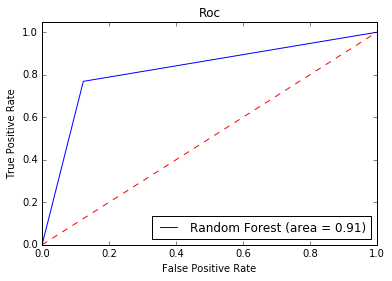

AUC:  0.906636026598
Confusion matrix 
: [[683  96]
 [190 632]]
             precision    recall  f1-score   support

          0       0.78      0.88      0.83       779
          1       0.87      0.77      0.82       822

avg / total       0.83      0.82      0.82      1601



In [140]:
## Random Forest Normalized + FH

max_val=0
y_test_selected= pd.DataFrame()

for i in range(0,10,1):
    X_train = smote_df.sample(frac = 0.7)
    X_test = smote_df.drop(X_train.index)
    y_train = label_binarize(pd.DataFrame(X_train['y']), classes=['yes', 'no'])
    y_train=pd.DataFrame(y_train)
    y_train.columns= ['cat']
    
    
    y_test = label_binarize(pd.DataFrame(X_test['y']), classes=['yes', 'no'])
    y_test=pd.DataFrame(y_test)
    y_test.columns= ['cat']
    


    clf = RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=None,min_samples_split=2, min_samples_leaf=50, min_weight_fraction_leaf=0.0, max_features='auto', max_leaf_nodes=None,bootstrap=True, oob_score=True, n_jobs=1, random_state=42, verbose=0, warm_start=False,class_weight=None)
    clf.fit(X_train.iloc[:,0:20],y_train)
    a= pd.DataFrame(clf.predict(X_test.iloc[:,0:20]))
    logit_roc_auc = roc_auc_score(y_test, a)
    #print(logit_roc_auc)
    if max_val<logit_roc_auc:
        max_val=logit_roc_auc
        y_test_selected=y_test

con_mat_test = confusion_matrix(y_test_selected, a, [0, 1])
logit_roc_auc = roc_auc_score(y_test_selected, a)
fpr, tpr, thresholds = roc_curve(y_test_selected, a)
plt.figure()
plt.plot(fpr, tpr, label='Random Forest (area = %0.2f)' % max_val)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Roc')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()
print("AUC: ",max_val )
print("Confusion matrix \n:", con_mat_test)
print(classification_report(y_test_selected, a))

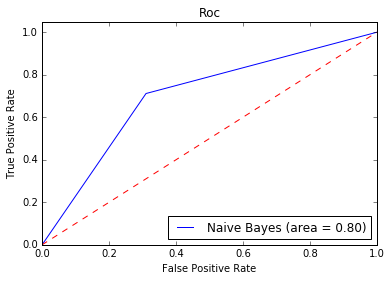

AUC:  0.795688186663
Confusion matrix :
 [[573 258]
 [222 548]]
             precision    recall  f1-score   support

          0       0.72      0.69      0.70       831
          1       0.68      0.71      0.70       770

avg / total       0.70      0.70      0.70      1601



In [157]:
## Naive Bayes FH+Scaled

from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB


max_val=0
y_test_selected= pd.DataFrame()

for i in range(0,10,1):
    X_train = smote_df.sample(frac = 0.7)
    X_test = smote_df.drop(X_train.index)
    y_train = label_binarize(pd.DataFrame(X_train['y']), classes=['yes', 'no'])
    y_train=pd.DataFrame(y_train)
    y_train.columns= ['cat']
    y_test = label_binarize(pd.DataFrame(X_test['y']), classes=['yes', 'no'])
    y_test=pd.DataFrame(y_test)
    y_test.columns= ['cat']
    
    clf = GaussianNB()
    clf.fit(X_train.iloc[:,0:20],y_train)
    a = clf.predict(X_test.iloc[:,0:20])
    logit_roc_auc = roc_auc_score(y_test, a)
    if max_val<logit_roc_auc:
        max_val=logit_roc_auc
        y_test_selected=y_test

con_mat_test = confusion_matrix(y_test_selected, a, [0, 1])
logit_roc_auc = roc_auc_score(y_test_selected, a)
fpr, tpr, thresholds = roc_curve(y_test_selected, a)
plt.figure()
plt.plot(fpr, tpr, label='Naive Bayes (area = %0.2f)' % max_val)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Roc')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()
print("AUC: ",max_val )
print("Confusion matrix :\n", con_mat_test)
print(classification_report(y_test_selected, a))


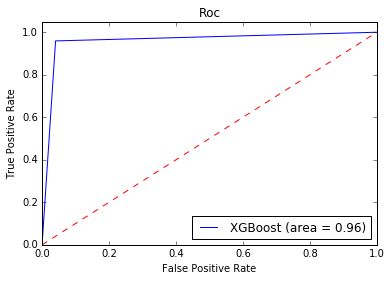

AUC:  0.959402663154
Confusion matrix: 
 [[761  32]
 [ 33 775]]
             precision    recall  f1-score   support

          0       0.96      0.96      0.96       793
          1       0.96      0.96      0.96       808

avg / total       0.96      0.96      0.96      1601



In [139]:
## XGBoost  FH+ Norm

import xgboost as xgb

max_val=0
y_test_selected= pd.DataFrame()

for i in range(0,10,1):
    X_train = smote_df.sample(frac = 0.7)
    X_test = smote_df.drop(X_train.index)
    y_train = label_binarize(pd.DataFrame(X_train['y']), classes=['yes', 'no'])
    y_train=pd.DataFrame(y_train)
    y_train.columns= ['cat']
    y_test = label_binarize(pd.DataFrame(X_test['y']), classes=['yes', 'no'])
    y_test=pd.DataFrame(y_test)
    y_test.columns= ['cat']
    
    
    gbm = xgb.XGBClassifier(max_depth=3, n_estimators=300, learning_rate=0.05).fit(X_train.iloc[:,0:20],y_train)
    a = gbm.predict(X_test.iloc[:,0:20])
    logit_roc_auc = roc_auc_score(y_test, a)
    if max_val<logit_roc_auc:
        max_val=logit_roc_auc
        y_test_selected=y_test

con_mat_test = confusion_matrix(y_test_selected, a, [0, 1])
logit_roc_auc = roc_auc_score(y_test_selected, a)
fpr_xgb, tpr_xgb, thresholds = roc_curve(y_test_selected, a)
plt.figure()
plt.plot(fpr_xgb, tpr_xgb, label='XGBoost (area = %0.2f)' % max_val)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Roc')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()
print("AUC: ",max_val )
print("Confusion matrix: \n", con_mat_test)
print(classification_report(y_test_selected, a))



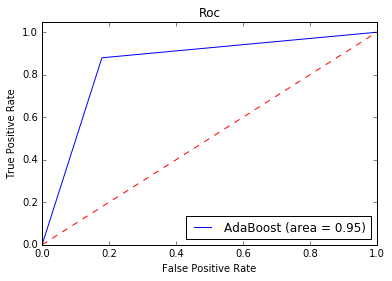

AUC:  0.954199242552
Confusion matrix: 
 [[680 148]
 [ 93 680]]
             precision    recall  f1-score   support

          0       0.88      0.82      0.85       828
          1       0.82      0.88      0.85       773

avg / total       0.85      0.85      0.85      1601



In [148]:
## Ada Boost Scaled +  OHE

from sklearn.model_selection import cross_val_score
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split

max_val=0
y_test_selected= pd.DataFrame()

for i in range(0,10,1):
    X_train = smote_df.sample(frac = 0.7)
    X_test = smote_df.drop(X_train.index)
    y_train = label_binarize(pd.DataFrame(X_train['y']), classes=['yes', 'no'])
    y_train=pd.DataFrame(y_train)
    y_train.columns= ['cat']
    y_test = label_binarize(pd.DataFrame(X_test['y']), classes=['yes', 'no'])
    y_test=pd.DataFrame(y_test)
    y_test.columns= ['cat']
    
    clf1 = AdaBoostClassifier(n_estimators=300)
    clf1.fit(X_train.iloc[:,0:20],y_train)
    a = clf1.predict(X_test.iloc[:,0:20])
    logit_roc_auc = roc_auc_score(y_test, a)
    if max_val<logit_roc_auc:
        max_val=logit_roc_auc
        y_test_selected=y_test

con_mat_test = confusion_matrix(y_test_selected, a, [0, 1])
logit_roc_auc = roc_auc_score(y_test_selected, a)
fpr_adb, tpr_adb , thresholds = roc_curve(y_test_selected, a)
plt.figure()
plt.plot(fpr_adb, tpr_adb, label='AdaBoost (area = %0.2f)' % max_val)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Roc')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()
print("AUC: ",max_val )
print("Confusion matrix: \n", con_mat_test)
print(classification_report(y_test_selected, a))



Accuracy from CV:  0.896810506567
C(lambda) value:  10
features numbers selected  [[ 0.36111142  0.05957304 -0.0913926   0.02622621 -0.05471773 -0.04650326
  -0.73883506  0.11934434 -0.06216812  0.08116521 -0.2557552  -2.08677341
   0.38651749  0.35382045  0.13671817  1.83497273 -1.48357271 -0.61945392
   0.99090592 -0.86541879]]


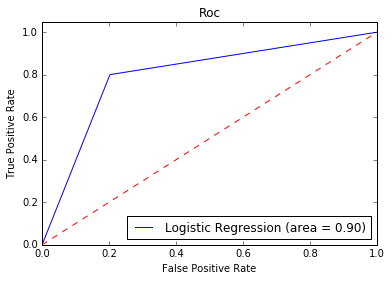

AUC:  0.895603538144
Confusion matrix :
 [[641 163]
 [159 638]]
             precision    recall  f1-score   support

          0       0.80      0.80      0.80       804
          1       0.80      0.80      0.80       797

avg / total       0.80      0.80      0.80      1601



In [158]:
##Logistic Regression   ##scaled + FH

logreg = LogisticRegression()
m=0
kfold = model_selection.StratifiedKFold(n_splits=5)

yres = label_binarize(pd.DataFrame(smote_df['y']), classes=['yes', 'no'])
yres=pd.DataFrame(yres)
yres.columns= ['cat']
    

C=[10,7.5,  1, .1,  0.1, .001]
for i in C:
    logreg = LogisticRegression(penalty='l1',solver='liblinear', C=i)
    logreg.fit(smote_df.iloc[:,0:20],yres)
    results = model_selection.cross_val_score(logreg,smote_df.iloc[:,0:20],yres, cv=5)
    
    if results.max()>m:
        m=results.max()
        i_val=i
        fea1= logreg.coef_


print("Accuracy from CV: ", m)                
print("C(lambda) value: ",i_val)
print("features numbers selected ",fea1) 



max_val=0
y_test_selected= pd.DataFrame()

for i in range(0,10,1):

    X_train = smote_df.sample(frac = 0.7)
    X_test = smote_df.drop(X_train.index)
    y_train = label_binarize(pd.DataFrame(X_train['y']), classes=['yes', 'no'])
    y_train=pd.DataFrame(y_train)
    y_train.columns= ['cat']
    y_test = label_binarize(pd.DataFrame(X_test['y']), classes=['yes', 'no'])
    y_test=pd.DataFrame(y_test)
    y_test.columns= ['cat']
    


    logreg = LogisticRegression(penalty='l1',solver='liblinear', C=10)
    logreg.fit(X_train.iloc[:,0:20],y_train)
    test_res= pd.DataFrame(logreg.predict(X_test.iloc[:,0:20]))
    logit_roc_auc = roc_auc_score(y_test, test_res)
    if max_val<logit_roc_auc:
        max_val=logit_roc_auc
        y_test_selected=y_test

        
con_mat_test = confusion_matrix(y_test_selected, test_res, [0, 1])

logit_roc_auc = roc_auc_score(y_test_selected, test_res)
fpr, tpr, thresholds = roc_curve(y_test_selected, test_res)
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % max_val)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Roc')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()
print("AUC: ",max_val )
print("Confusion matrix :\n", con_mat_test)
print(classification_report(y_test_selected, test_res))



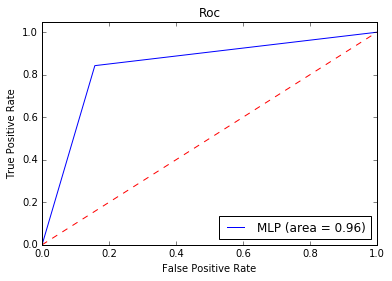

AUC:  0.958501249609
Confusion matrix: 
 [[695 130]
 [122 654]]
             precision    recall  f1-score   support

          0       0.85      0.84      0.85       825
          1       0.83      0.84      0.84       776

avg / total       0.84      0.84      0.84      1601



In [149]:
## Multilayer perceptron #OHE+Scaled


from sklearn.neural_network import MLPClassifier


max_val=0
y_test_selected= pd.DataFrame()

for i in range(0,10,1):
    X_train = smote_df.sample(frac = 0.7)
    X_test = smote_df.drop(X_train.index)
    y_train = label_binarize(pd.DataFrame(X_train['y']), classes=['yes', 'no'])
    y_train=pd.DataFrame(y_train)
    y_train.columns= ['cat']
    y_test = label_binarize(pd.DataFrame(X_test['y']), classes=['yes', 'no'])
    y_test=pd.DataFrame(y_test)
    y_test.columns= ['cat']
    clf = MLPClassifier(solver='adam' )
    clf.fit(X_train.iloc[:,0:20],y_train)

    y_pred_mlp= pd.DataFrame(clf.predict(X_test.iloc[:,0:20]))
    logit_roc_auc = roc_auc_score(y_test, y_pred_mlp)
    if max_val<logit_roc_auc:
        max_val=logit_roc_auc
        y_test_selected=y_test
    
    
con_mat_test = confusion_matrix(y_test_selected, y_pred_mlp, [0, 1])

logit_roc_auc = roc_auc_score(y_test_selected, y_pred_mlp)
fpr_mlp, tpr_mlp, thresholds = roc_curve(y_test_selected, y_pred_mlp)
plt.figure()
plt.plot(fpr_mlp, tpr_mlp, label='MLP (area = %0.2f)' % max_val)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Roc')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()
print("AUC: ",max_val )
print("Confusion matrix: \n", con_mat_test)
print(classification_report(y_test_selected, y_pred_mlp))



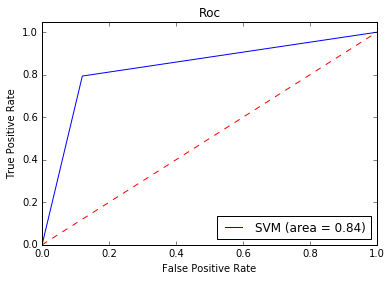

AUC:  0.842603873789
Confusion matrix: 
 [[717  98]
 [162 624]]
             precision    recall  f1-score   support

          0       0.82      0.88      0.85       815
          1       0.86      0.79      0.83       786

avg / total       0.84      0.84      0.84      1601



In [150]:
## SVM  ## scaled  + OHE
from sklearn.svm import SVC
max_val=0
y_test_selected= pd.DataFrame()

for i in range(0,10,1):
    X_train = smote_df.sample(frac = 0.7)
    X_test = smote_df.drop(X_train.index)
    y_train = label_binarize(pd.DataFrame(X_train['y']), classes=['yes', 'no'])
    y_train=pd.DataFrame(y_train)
    y_train.columns= ['cat']
    y_test = label_binarize(pd.DataFrame(X_test['y']), classes=['yes', 'no'])
    y_test=pd.DataFrame(y_test)
    y_test.columns= ['cat']


    clf = SVC()
    clf.fit(X_train.iloc[:,0:20],y_train)

    a=clf.predict(X_test.iloc[:,0:20])
    if max_val<logit_roc_auc:
        max_val=logit_roc_auc
        y_test_selected=y_test

con_mat_test = confusion_matrix(y_test_selected, a, [0, 1])
logit_roc_auc = roc_auc_score(y_test_selected, a)
fpr, tpr, thresholds = roc_curve(y_test_selected, a)
plt.figure()
plt.plot(fpr, tpr, label='SVM (area = %0.2f)' % max_val)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Roc')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()
print("AUC: ",max_val )
print("Confusion matrix: \n", con_mat_test)
print(classification_report(y_test_selected, a))




# ROCs of the top 3 classification models. 

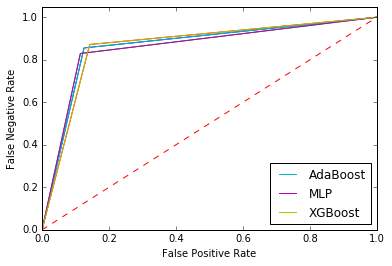

In [136]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = plt.axes()
ax.plot(fpr_adb, tpr_adb)
ax.plot(fpr_mlp, tpr_mlp)
ax.plot(fpr_xgb, tpr_xgb)
plt.xlabel('False Positive Rate')
plt.ylabel('False Negative Rate')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.plot(fpr_adb, tpr_adb, label='AdaBoost')
plt.plot(fpr_mlp, tpr_mlp, label='MLP')
plt.plot(fpr_xgb, tpr_xgb, label='XGBoost')
plt.legend(loc="lower right")
plt.show()